In [50]:
import importlib
import utils.file_utils as fu
importlib.reload(fu)

df = fu.load_dataset(header=["Speaker", "Year", "Topic"])
df.head()


Loaded 3492 records from C:\data\around-work\academinc-work\2025\css\css.csv
Columns: Index(['Type', 'Speaker', 'Topic', 'Year'], dtype='object')
Adding column "combined"


,Speaker,Year,Topic,combined
0,Michael Macy,2015,Opportunities and challenges for computational...,Speaker: Michael Macy; Year: 2015; Topic: Oppo...
1,Jure Leskovec,2015,Structure and dynamics of information propagation,Speaker: Jure Leskovec; Year: 2015; Topic: Str...
2,"Omar Guerrero, Eduardo Lopez, Robert Axtell",2015,Labor flows and unemployment mediated by networks,"Speaker: Omar Guerrero, Eduardo Lopez, Robert ..."
3,Duncan Watts,2015,An experimental study of collective self-organ...,Speaker: Duncan Watts; Year: 2015; Topic: An e...
4,Matthew Jackson,2015,Multiplexing and the interaction between borro...,Speaker: Matthew Jackson; Year: 2015; Topic: M...


In [51]:
df['Speakers'] = df['Speaker']
df_exploded = df.assign(Speaker=df["Speaker"].str.split(", ")).explode("Speaker")

df_exploded.head()

,Speaker,Year,Topic,combined,Speakers
0,Michael Macy,2015,Opportunities and challenges for computational...,Speaker: Michael Macy; Year: 2015; Topic: Oppo...,Michael Macy
1,Jure Leskovec,2015,Structure and dynamics of information propagation,Speaker: Jure Leskovec; Year: 2015; Topic: Str...,Jure Leskovec
2,Omar Guerrero,2015,Labor flows and unemployment mediated by networks,"Speaker: Omar Guerrero, Eduardo Lopez, Robert ...","Omar Guerrero, Eduardo Lopez, Robert Axtell"
2,Eduardo Lopez,2015,Labor flows and unemployment mediated by networks,"Speaker: Omar Guerrero, Eduardo Lopez, Robert ...","Omar Guerrero, Eduardo Lopez, Robert Axtell"
2,Robert Axtell,2015,Labor flows and unemployment mediated by networks,"Speaker: Omar Guerrero, Eduardo Lopez, Robert ...","Omar Guerrero, Eduardo Lopez, Robert Axtell"


In [52]:
speakers_per_year = df_exploded.groupby("Year")["Speakers"].nunique().sort_index()
speaker_per_year = df_exploded.groupby("Year")["Speaker"].nunique().sort_index()
publication_count_per_speakers = df.groupby("Speakers")["Year"].count().reset_index(name="Publication Count").sort_values(by="Publication Count", ascending=False)
publication_count_per_speaker = df_exploded.groupby("Speaker")["Year"].count().reset_index(name="Publication Count").sort_values(by="Publication Count", ascending=False)
first_last_publication_by_speakers = df.groupby("Speakers")["Year"].agg(["min", "max", "count"]).sort_values(by=["min", "max", "count"])
first_last_publication_by_speaker = df_exploded.groupby("Speaker")["Year"].agg(["min", "max", "count"]).sort_values(by=["min", "max", "count"])
publications_per_year = df["Year"].value_counts().sort_index()


speakers = df['Speaker'].nunique()
print(f'Number of unique speakers:\n{speakers}')
print(f'Number of speakers (combined) per year:\n{speakers_per_year}')
print(f'Number of speakers per year:\n{speaker_per_year}')
print(f'Number of publications per speakers (combined):\n{publication_count_per_speakers}')
print(f'Number of publications per speaker:\n{publication_count_per_speaker}')
print(f'First and last publication per speakers (combined):\n{first_last_publication_by_speakers}')
print(f'First and last publication per speaker:\n{first_last_publication_by_speaker}')
print(f'Publications per year:\n{publications_per_year}')


Number of unique speakers:
3322
Number of speakers (combined) per year:
Year
2015    305
2016    233
2017    211
2018    235
2019    372
2020    428
2021    274
2022    153
2023    603
2024    615
Name: Speakers, dtype: int64
Number of speakers per year:
Year
2015     795
2016     568
2017     542
2018     530
2019     858
2020     988
2021     703
2022     416
2023    1482
2024    1358
Name: Speaker, dtype: int64
Number of publications per speakers (combined):
                                               Speakers  Publication Count
1564                                       Ivan Smirnov                  6
2781  Santa Agreste, Pasquale De Meo, Emilio Ferrara...                  4
495   Asael H Sorensen, Asmeret Naugle, Casey Doyle,...                  4
2968                                       Taha Yasseri                  4
2928                                  Subhayan Mukerjee                  3
...                                                 ...                ...
1125     

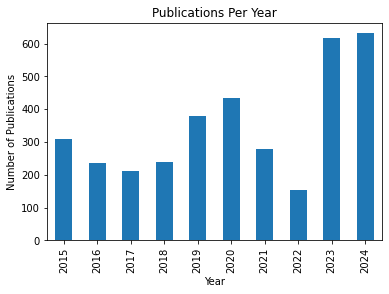

In [54]:
import matplotlib.pyplot as plt

publications_per_year.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.title("Publications Per Year")
plt.show()

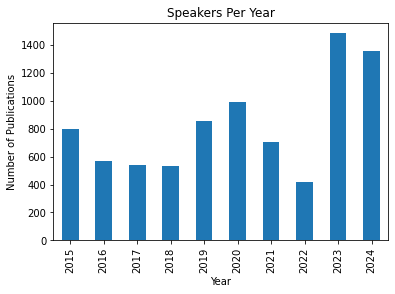

In [57]:
speaker_per_year.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.title("Speakers Per Year")
plt.show()

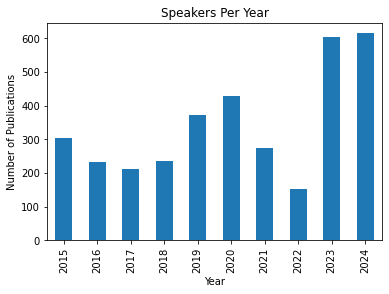

In [56]:
speakers_per_year.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.title("Speakers (combined) Per Year")
plt.show()
